# Trading Day Data Visualization

#### 1) minute chart data from finance.yahoo

In [35]:
from urllib.parse import urlencode
from datetime import datetime, timedelta
import pandas as pd
import requests
import pytz
import json

DATA_TIMEZONE = pytz.timezone("America/New_York")

def get_minute_data(symbol, now):
    
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    end = start.replace(hour=13, minute=0)
    url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
          "&interval=1m&indicators=quote&includeTimestamps=true&"\
          "events=div%7Csplit%7Cearn".format(symbol, start.timestamp(), end.timestamp())
            
    page = requests.get(url)
    result = page.json()['chart']['result']
    if not result:
        print(page.json())
        return
    
    data = result[0]
    quote = data['indicators']['quote'][0]
    if 'timestamp' not in data:
        print("Error: timestamp not in data")
        return
    times = data['timestamp']
    period = data['meta']['currentTradingPeriod']['regular']
    start, end = period['start'], period['end']
    df = pd.DataFrame(quote, index=[datetime.fromtimestamp(t, tz=DATA_TIMEZONE).astimezone(now.tzinfo) for t in times])
    return df


la_tz = pytz.timezone('America/Los_Angeles')
now = datetime.now(tz=la_tz).replace(year=2018, month=5, day=25, hour=12, minute=0, second=0)
minute_data = get_minute_data('BAC', now)
minute_data

,close,high,low,open,volume
2018-05-25 06:30:00-07:00,30.010000,30.010000,30.010000,30.010000,0
2018-05-25 06:31:00-07:00,30.030001,30.049999,30.014999,30.030001,772388
2018-05-25 06:32:00-07:00,29.959999,30.035000,29.959999,30.025000,438471
2018-05-25 06:33:00-07:00,30.025000,30.059000,29.959999,29.959999,229507
2018-05-25 06:34:00-07:00,30.000000,30.049999,29.985001,30.030001,167629
2018-05-25 06:35:00-07:00,30.049999,30.049999,29.990000,29.990000,191268
2018-05-25 06:36:00-07:00,30.000000,30.059999,30.000000,30.059999,156752
2018-05-25 06:37:00-07:00,29.990000,29.990000,29.969999,29.990000,316719
2018-05-25 06:38:00-07:00,29.969999,30.000000,29.969999,29.990000,219930
2018-05-25 06:39:00-07:00,29.955000,29.980000,29.924999,29.980000,354191


In [32]:
datetime.fromtimestamp(1527019080, tz=DATA_TIMEZONE).astimezone(la_tz)

datetime.datetime(2018, 5, 22, 12, 58, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>)

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


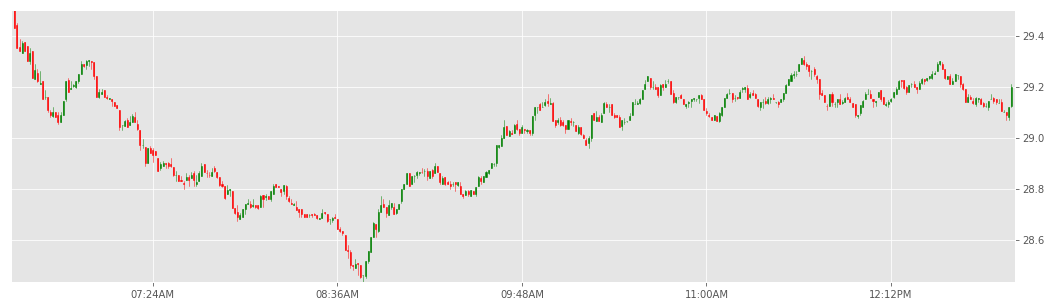

In [2]:
%matplotlib inline

from matplotlib.finance import *
import matplotlib.pyplot as plt
from matplotlib import ticker, style
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
    
style.use('ggplot')

def plot_minute_data(data):
    if data is not None:
        fig = plt.figure(figsize=(18, 5))
        ax = plt.subplot(111)
        candlestick_ochl(
            ax, 
            ((date2num(r.Index), r.open, r.close, r.high, r.low) 
             for r in data.itertuples()), 
            width=1/3600,  
            colorup='g',  
            colordown='r',
        )

        x_min, x_max = date2num(data.index.min()) - .001, date2num(data.index.max()) + .001
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(data.low.min(), data.high.max())

        minute_formatter = DateFormatter('%I:%M%p', tz=pytz.timezone('America/Los_Angeles'))
        ax.xaxis.set_major_formatter(minute_formatter)

        ax.yaxis.tick_right()
        plt.show()

plot_minute_data(minute_data)

#### 2) the trade lot data from nasdaq.com

In [3]:
from urllib.parse import quote_plus, urlparse, parse_qs
from lxml import html
import queue
import requests
import threading
import re

NUM_THREADS = 2 
    
    
def get_trades_tree(stock, time, pageno):
    url = "https://www.nasdaq.com/symbol/{symbol}/time-sales?time={time}&pageno={pageno}".format(
        symbol=stock, time=time, pageno=pageno
    )
    page_res = requests.get(url, timeout=6)
    result = html.fromstring(page_res.content)
    return result


def page_get_lots(tree):
    table = tree.find('.//table[@id="AfterHoursPagingContents_Table"]')
    if table is None:
        raise ProxyFailException('The table is missing')
    else:
        lots = [
            tuple(col.text_content() for col in row) 
            for row in table 
            if row.tag == 'tr'
        ]
        return lots
    
def pull_trades(q, r, stock, time, pageno=None):
    tree = get_trades_tree(stock, time, pageno or 1)
    if pageno is None:
        pager = tree.find('.//ul[@id="pager"]')
        if pager is not None:
            page_links = pager.findall('.//a')
            if page_links:
                href = page_links[-1].attrib['href']
                parsed_url = urlparse(href)
                query_params = parse_qs(parsed_url.query)
                max_page = int(query_params['pageno'][0])

                for pn in range(1, max_page + 1):
                    q.put((stock, time, pn))

    for l in page_get_lots(tree):
        r.put(l)
            
def save_trades(responses_query, now):
    df = pd.DataFrame([], columns=('Time', 'Price', 'Volume'))
    i = 0
    while True:
        try:
            time, price, volume = responses_query.get(block=False)
        except queue.Empty:
            break
        else:
            df.loc[i] = (
                re.sub(r'[^\d:]+', '', time), 
                float(re.sub(r'[^\d\.]+', '', price)), 
                int(re.sub(r'[^\d]+', '', volume))
            )
            i += 1
    return df

def load_in_parrallel(*args, now):   
    
    tasks = queue.Queue() # queue with arguments for the 'get_transactions' function
    responses = queue.Queue() # queue with raw responses  
    
    def worker():    
        while True:
            args = tasks.get()
            if args is None:
                break
            try:
                pull_trades(tasks, responses, *args)
            except Exception as e:
                print("Error:", e)
                tasks.put(args)
                
            tasks.task_done()
    

    threads = []
    for i in range(NUM_THREADS):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
        
    tasks.put(args)

    # block until all tasks are done
    tasks.join()

    # stop workers
    for i in range(NUM_THREADS):
        tasks.put(None)

    for t in threads:
        t.join()
        
    return save_trades(responses, now)

In [4]:
def get_trade_lots(symbol, now, time):    
    df = load_in_parrallel(symbol, time, now=now) 
    df = df[df.Volume >= 1000]
    df['Minute'] = df.Time.str[:5]
    df['Cost'] = df.Price * df.Volume * 100   
    df['TimePeriod'] = time
    df = df.sort_values(by=['Time'], ascending=False)
    return df

df = get_trade_lots('BAC', now, time=1)
df

,Time,Price,Volume,Minute,Cost,TimePeriod
179,09:59:38,29.9700,1400.0,09:59,4195800.0,1
192,09:59:38,29.9800,1300.0,09:59,3897400.0,1
221,09:59:38,29.9700,1400.0,09:59,4195800.0,1
219,09:59:38,29.9700,1400.0,09:59,4195800.0,1
200,09:59:38,29.9800,1300.0,09:59,3897400.0,1
181,09:59:38,29.9700,1400.0,09:59,4195800.0,1
188,09:59:38,29.9800,1499.0,09:59,4494002.0,1
185,09:59:38,29.9700,1400.0,09:59,4195800.0,1
184,09:59:38,29.9700,1400.0,09:59,4195800.0,1
187,09:59:38,29.9800,1499.0,09:59,4494002.0,1


In [5]:
# This function will display the table
from IPython.display import display, HTML
from datetime import datetime
import numpy as np
import math


def display_trade_lots_tables(data, minute_data, now):
    if data is None or not len(data):
        print("Trade lots list is empty")
        return
    data['Count'] = 1 
    def apply_minute_data(df):
        ny_timezone = pytz.timezone('America/New_York')
        
        def fetch_minute_data(row):
            minute = row.Minute if 'Minute' in df.dtypes.keys() else row.name 
            hour, minute = minute.split(':')
            time = now.replace(hour=int(hour), minute=int(minute), second=0, microsecond=0, tzinfo=ny_timezone)
            time = datetime(
                now.year, now.month, now.day, 
                hour=int(hour), minute=int(minute), second=0, microsecond=0,
            )        
            time = ny_timezone.localize(time)
            if minute_data is not None and time in minute_data.index:
                md = minute_data.loc[time]
                open, close = md.open, md.close
            else:
                open = close = None        
            return open, close    

        df['Open'], df['Close'] = zip(*df.apply(fetch_minute_data, axis=1))
        df['CloseByOpen'] = (df.Close / df.Open - 1) * 100
    
    def display_table(rows):
        headers = ("Time", "Open", "Close", "Close/Open", "Shares", "Cost", "# of lots")
        row = "<td>{time}</td><td>{open}</td><td>{close}</td><td>{co_tab} {close_by_open}</td>"\
              "<td>{vo_tab} {volume:,.0f}</td><td>{cost_tab} {cost:,.0f}</td><td>{count_tab} {count}</td>"
        table_rows = (row.format(**kwargs) for kwargs in rows) 
        display(
            HTML(
                '<table><tr><th>{}</th></tr><tr>{}</tr></table>'.format(
                    "</th><th>".join(headers),
                    "</tr><tr>".join(table_rows)
                )
            )
        )  
    
    
    display(HTML("<h4>AGGREGATED TRADING FEED BY MINUTE</h4>"))
    sum_data = data.groupby(['Minute'])['Cost', 'Volume', 'Count'].sum()
    apply_minute_data(sum_data)
    sum_data = sum_data.sort_index(ascending=False)
    
    def get_tab(value, min_value, max_value, color):
        n = 0        
        if not pd.isnull(value):
            diff = max_value - min_value
            if diff:
                n = math.ceil((value - min_value) / diff * 20)
                
        return '<div style="float:left;background-color:{};height=20px;" >{}</div>&nbsp;'.format(
            "green" if color >= 0 else "red",
            "&nbsp;" * (n + 1), 
        )
    min_co, max_co = sum_data.CloseByOpen.min(), sum_data.CloseByOpen.max()
    min_vo, max_vo = sum_data.Volume.min(), sum_data.Volume.max()
    min_cost, max_cost = sum_data.Cost.min(), sum_data.Cost.max()
    min_count, max_count = sum_data.Count.min(), sum_data.Count.max()
    rows = (dict(time=r.Index, 
                 open="{:.4f}".format(r.Open) if r.Open else r.Open, 
                 close="{:.4f}".format(r.Close) if r.Close else r.Close, 
                 close_by_open="{:.4f}".format(r.CloseByOpen) if r.CloseByOpen else r.CloseByOpen,                 
                 volume=r.Volume, cost=r.Cost, count=r.Count,
                 co_tab=get_tab(r.CloseByOpen, min_co, max_co, r.CloseByOpen),
                 vo_tab=get_tab(r.Volume, min_vo, max_vo, r.CloseByOpen),
                 cost_tab=get_tab(r.Cost, min_cost, max_cost, r.CloseByOpen),
                 count_tab=get_tab(r.Count, min_count, max_count, r.CloseByOpen),
                ) 
            for r in sum_data.itertuples())
    display_table(rows)
    
    display(HTML("<h4>SEGREGATED TRADING FEED BY MINUTE</h4>"))
    apply_minute_data(data)
    min_co, max_co = data.CloseByOpen.min(), data.CloseByOpen.max()
    min_vo, max_vo = data.Volume.min(), data.Volume.max()
    min_cost, max_cost = data.Cost.min(), data.Cost.max()
    min_count, max_count = data.Count.min(), data.Count.max()
    rows = (dict(time=r.Minute, 
                 open="{:.4f}".format(r.Open) if r.Open else r.Open, 
                 close="{:.4f}".format(r.Close) if r.Close else r.Close, 
                 close_by_open="{:.4f}".format(r.CloseByOpen) if r.CloseByOpen else r.CloseByOpen,                  
                 volume=r.Volume, cost=r.Cost, count=r.Count,
                 co_tab=get_tab(r.CloseByOpen, min_co, max_co, r.CloseByOpen),
                 vo_tab=get_tab(r.Volume, min_vo, max_vo, r.CloseByOpen),
                 cost_tab=get_tab(r.Cost, min_cost, max_cost, r.CloseByOpen),
                 count_tab=get_tab(r.Count, min_count, max_count, r.CloseByOpen),
                )
            for r in data.itertuples())
    display_table(rows)
    
    
#     return sum_data 

display_trade_lots_tables(df, minute_data, now)

Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,29.3000,29.3035,0.0119,"55,552","166,550,606",22
09:58,29.2850,29.3000,0.0512,"47,776","143,249,266",18
09:57,29.2900,29.2801,-0.0338,"60,894","182,478,237",26
09:56,29.2500,29.2900,0.1368,"66,450","199,238,150",26
09:55,29.2200,29.2500,0.1027,"50,800","152,146,476",20
09:54,29.2000,29.2200,0.0685,"72,268","216,546,987",36
09:53,29.2034,29.2050,0.0055,"117,804","352,973,262",66
09:52,29.1900,29.1950,0.0171,"110,520","331,270,537",68
09:51,29.2250,29.1800,-0.1540,"99,138","296,767,198",44
09:50,29.1500,29.2200,0.2401,"128,224","383,454,927",56


Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,29.3000,29.3035,0.0119,"1,400","4,195,800",1
09:59,29.3000,29.3035,0.0119,"1,300","3,897,400",1
09:59,29.3000,29.3035,0.0119,"1,400","4,195,800",1
09:59,29.3000,29.3035,0.0119,"1,400","4,195,800",1
09:59,29.3000,29.3035,0.0119,"1,300","3,897,400",1
09:59,29.3000,29.3035,0.0119,"1,400","4,195,800",1
09:59,29.3000,29.3035,0.0119,"1,499","4,494,002",1
09:59,29.3000,29.3035,0.0119,"1,400","4,195,800",1
09:59,29.3000,29.3035,0.0119,"1,400","4,195,800",1
09:59,29.3000,29.3035,0.0119,"1,499","4,494,002",1


1) minute chart data from finance.yahoo


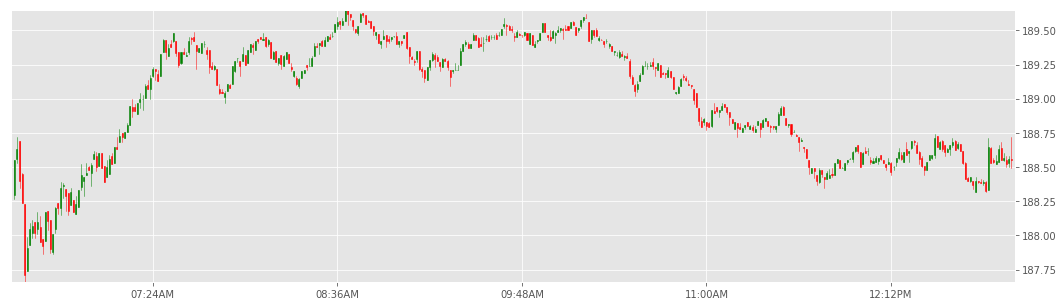

2) the trade lot data from nasdaq.com


Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,188.5000,188.4800,-0.0106,"15,576","293,591,678",8
09:58,188.4400,188.4600,0.0106,"6,300","118,739,900",3
09:57,188.4000,188.4300,0.0159,"11,070","208,513,338",4
09:56,188.3550,188.4400,0.0451,"23,700","446,610,996",8
09:55,188.2100,188.3300,0.0638,"5,600","105,439,320",3
09:54,188.1600,188.2300,0.0372,"3,836","72,196,004",2
09:53,188.2600,188.1700,-0.0478,"1,925","36,238,106",1
09:52,188.2200,188.3200,0.0531,"8,176","153,957,303",4
09:51,188.3084,188.1800,-0.0682,"29,770","560,342,823",15
09:50,188.3400,188.2900,-0.0265,"8,027","151,132,744",4


Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,188.5000,188.4800,-0.0106,"1,900","35,806,298",1
09:59,188.5000,188.4800,-0.0106,"1,900","35,806,298",1
09:59,188.5000,188.4800,-0.0106,"1,000","18,850,160",1
09:59,188.5000,188.4800,-0.0106,"1,000","18,850,160",1
09:59,188.5000,188.4800,-0.0106,"3,000","56,552,280",1
09:59,188.5000,188.4800,-0.0106,"3,000","56,552,280",1
09:59,188.5000,188.4800,-0.0106,"1,888","35,587,101",1
09:59,188.5000,188.4800,-0.0106,"1,888","35,587,101",1
09:58,188.4400,188.4600,0.0106,"1,600","30,163,200",1
09:58,188.4400,188.4600,0.0106,"2,200","41,470,000",1


last update 2018-05-25 08:15:43.141166-07:00
prev update None
update time 3 days, 0:01:07.153083


KeyboardInterrupt: 

In [40]:
from datetime import datetime, timedelta
from IPython.display import clear_output
from matplotlib import ticker, dates as mdates
import numpy as np
import pytz
from time import sleep
import heapq
import math

tz = pytz.timezone('America/Los_Angeles')
STOCK_SYMBOL = 'AAPL'

last_time = None
trade_lots = None
lots_times = (
    (6, 59),
    (7, 29),
    (7, 59),
    (8, 29),
    (8, 59),
    (9, 29),
    (9, 59),
    (10,29),
    (10, 59),
    (11, 29),
    (11, 59),
    (12, 29),
    (13, 0),
)
current_time_period = 1


while True:    
    now = datetime.now(tz=tz)
    
    now = now.replace(day=25)
    
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds            
            if diff > 0:
                sleep(diff)
        
        # GETTING DATA
        minute_data = get_minute_data(STOCK_SYMBOL, now)        
        
        leh, lem = lots_times[current_time_period - 1]
        time_range_end = start.replace(hour=leh, minute=lem)
        if last_time and last_time > time_range_end:
            current_time_period += 1
        
        response = get_trade_lots(STOCK_SYMBOL, now, current_time_period)
        res_len = len(response)
        if res_len:            
            if trade_lots is not None:
                trade_lots = trade_lots[trade_lots.TimePeriod != current_time_period]
                trade_lots = response.append(trade_lots, ignore_index=True)
            else:
                trade_lots = response

        # DISPLAYING DATA
        clear_output()
        print('1) minute chart data from finance.yahoo')
        plot_minute_data(minute_data)
        
        print('2) the trade lot data from nasdaq.com')
        display_trade_lots_tables(trade_lots, minute_data, now)    
        
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=tz) - now)
        last_time = now        
    else: 
        current_time_period = 1
        trade_lots = None
        
        if now < start:
            diff = start - now
            print("time to start:", diff)
            
        else:
            start_tommorow = start + timedelta(days=1)
            print("start tommorow at", start_tommorow)
            diff = start_tommorow - now
        
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)